In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch.nn as nn
import cv2
import matplotlib.pyplot as plt

In [2]:
load_saved_model = False

In [3]:
def Image_breakdown_even_further(img,lr=True):
    if lr:
        img_mini_batch = []
        h = img.shape[2]/2
        w = img.shape[3]/2
        
        if (h-int(h) != 0):
            h1 = int(h - .5)
            h2 = int(h + .5)
        else:
            h1 = int(h)
            h2 = int(h)
        
        if (w-int(w) != 0):
            w1 = int(w - .5)
            w2 = int(w + .5)
        else:
            w1 = int(w)
            w2 = int(w)
    else:
        img_mini_batch = []
        h = img.shape[2]/2
        w = img.shape[3]/2
        h = h/4
        w = w/4
        
        if (h-int(h) != 0):
            h1 = int(h - .5)*4
            h2 = int(h + .5)*4
        else:
            h1 = int(h)*4
            h2 = int(h)*4
        
        if (w-int(w) != 0):
            w1 = int(w - .5)*4
            w2 = int(w + .5)*4
        else:
            w1 = int(w)*4
            w2 = int(w)*4
        
    top_left = img[ :, :, :h1, :w1]
    top_right = img[ :, :, :h1, w1:w1+w2]
    bottom_left = img[ :, :, h1:h1+h2, :w1]
    bottom_right = img[ :, :, h1:h1+h2, w1:w1+w2]
    img_mini_batch = [top_left,top_right,bottom_left,bottom_right]
    return img_mini_batch

In [4]:
def Image_breakdown_further(img, lr=True):
    if lr:
        img_mini_batch = []
        h = img.shape[2]/2
        w = img.shape[3]/2
        
        if (h-int(h) != 0):
            h1 = int(h - .5)
            h2 = int(h + .5)
        else:
            h1 = int(h)
            h2 = int(h)
        
        if (w-int(w) != 0):
            w1 = int(w - .5)
            w2 = int(w + .5)
        else:
            w1 = int(w)
            w2 = int(w)
    else:
        img_mini_batch = []
        h = img.shape[2]/2
        w = img.shape[3]/2
        h = h/4
        w = w/4
        
        if (h-int(h) != 0):
            h1 = int(h - .5)*4
            h2 = int(h + .5)*4
        else:
            h1 = int(h)*4
            h2 = int(h)*4
        
        if (w-int(w) != 0):
            w1 = int(w - .5)*4
            w2 = int(w + .5)*4
        else:
            w1 = int(w)*4
            w2 = int(w)*4
        
    top_left = img[ :, :, :h1, :w1]
    top_right = img[ :, :, :h1, w1:w1+w2]
    bottom_left = img[ :, :, h1:h1+h2, :w1]
    bottom_right = img[ :, :, h1:h1+h2, w1:w1+w2]
    img_mini_batch = [top_left,top_right,bottom_left,bottom_right]
    img_16_mini_batch = []
    to_be_returned = []
    
    for i in img_mini_batch:
        x = Image_breakdown_even_further(i,lr)
        for j in x:
            img_16_mini_batch.append(j)
    
    positions_of_mini_images = [0,1,4,5,2,3,6,7,8,9,12,13,10,11,14,15]
    for i in range(0,16):
        to_be_returned.append(img_16_mini_batch[positions_of_mini_images[i]])
    
    return to_be_returned

In [5]:
def Image_breakdown(img, lr=True):
    if lr:
        img_mini_batch = []
        h = img.shape[1]/2
        w = img.shape[2]/2
        
        if (h-int(h) != 0):
            h1 = int(h - .5)
            h2 = int(h + .5)
        else:
            h1 = int(h)
            h2 = int(h)
        
        if (w-int(w) != 0):
            w1 = int(w - .5)
            w2 = int(w + .5)
        else:
            w1 = int(w)
            w2 = int(w)
    else:
        img_mini_batch = []
        h = img.shape[1]/2
        w = img.shape[2]/2
        h = h/4
        w = w/4
        
        if (h-int(h) != 0):
            h1 = int(h - .5)*4
            h2 = int(h + .5)*4
        else:
            h1 = int(h)*4
            h2 = int(h)*4
        
        if (w-int(w) != 0):
            w1 = int(w - .5)*4
            w2 = int(w + .5)*4
        else:
            w1 = int(w)*4
            w2 = int(w)*4
        
    top_left = img[ :, :h1, :w1]
    top_right = img[ :, :h1, w1:w1+w2]
    bottom_left = img[ :, h1:h1+h2, :w1]
    bottom_right = img[ :, h1:h1+h2, w1:w1+w2]
    img_mini_batch = [top_left,top_right,bottom_left,bottom_right]
    img_64_mini_batch = []
    to_be_returned = []
    
    for i in img_mini_batch:
        x = Image_breakdown_further(i,lr)
        for j in x:
            img_64_mini_batch.append(j)
    
    positions_of_mini_images = [0,1,2,3,16,17,18,19,4,5,6,7,20,21,22,23,8,9,10,11,24,25,26,27,12,13,14,15,16,28,29,30,31,
                                32,33,34,35,48,49,50,51,36,37,38,39,52,53,54,55,40,41,42,43,56,57,58,59,44,45,46,47,60,61,62,63]
    for i in range(0,64):
        to_be_returned.append(img_64_mini_batch[positions_of_mini_images[i]])
    
    return to_be_returned

torch.Size([3, 1356, 2040])
16
torch.Size([1, 3, 336, 512])


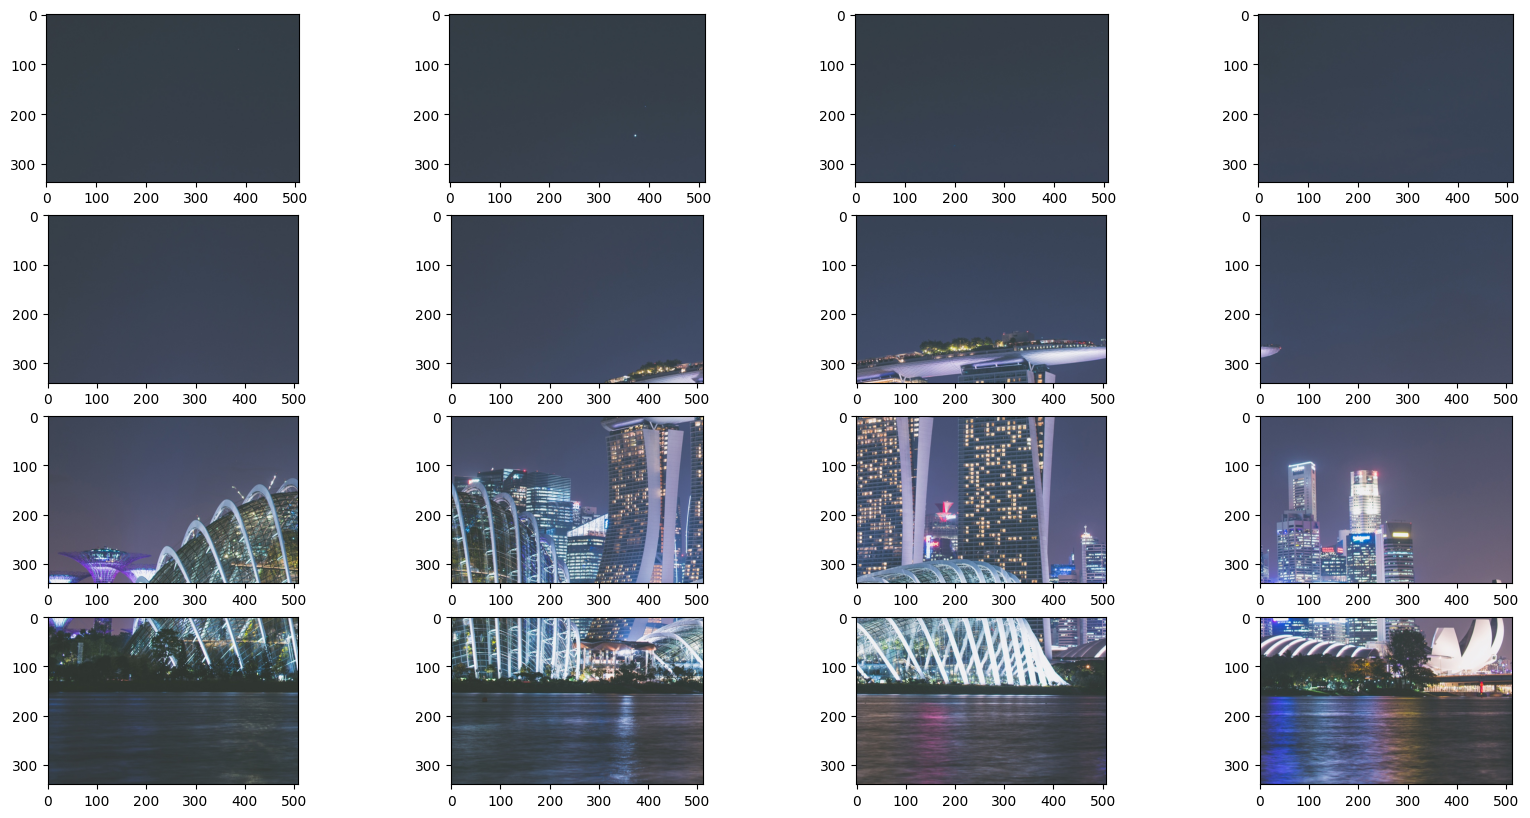

In [6]:
img = plt.imread(r'C:\Users\get2b\Desktop\Arav\AI ML\DATA SETS\Generative AI dataset DIV2K\DIV2K_valid_HR\DIV2K_valid_HR\0814.png')
img = torch.Tensor(img).permute(2,0,1)
print(img.shape)
img = img.unsqueeze(0)
x = Image_breakdown_further(img,lr=False)
print(len(x))
print(x[1].shape)
rows = 4
columns = 4
fig = plt.figure(figsize=(20, 10))
for i in range(1,17):
    fig.add_subplot(rows, columns, i)
    x[i-1] = x[i-1].permute(0,2,3,1)
    x[i-1] = x[i-1].cpu().detach().numpy()
    plt.imshow(x[i-1][0])
    plt.grid(visible=False)

### Reading the labels of ImageNet from the folder and then One Hot Encoding them

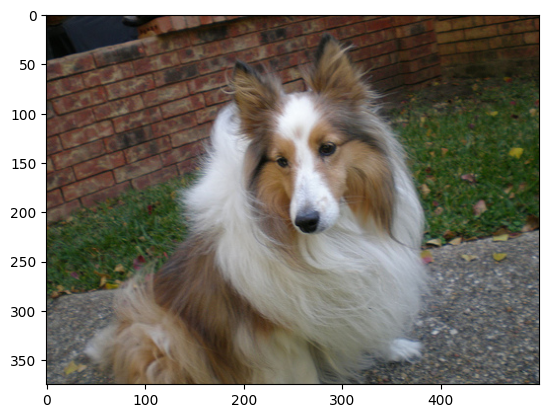

In [7]:
img = plt.imread(r"C:\Users\get2b\Desktop\Arav\AI ML\DATA SETS\ImageNet validation\val\ILSVRC2012_val_00000003.jpeg")
plt.imshow(img)
img = torch.tensor(img)

torch.Size([375, 500, 3])
torch.Size([3, 375, 500])
0.02078700065612793
torch.Size([1, 3, 93, 125])


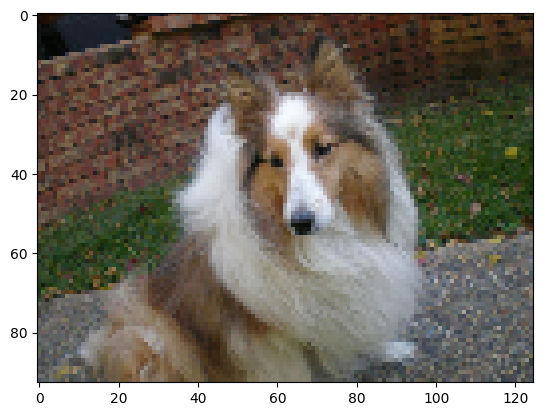

In [8]:
import time
print(img.shape)
img1 = img.permute(2,0,1)
print(img1.shape)
beginning_time = time.time()
downscaled = torch.nn.functional.interpolate(img1.unsqueeze(0),scale_factor=0.25)
ending_time = time.time()
time_taken = (ending_time-beginning_time)
print(time_taken)
print(downscaled.shape)
plt.imshow(downscaled[0].permute(1,2,0))

## **VGG-19 Pretrained on ImageNet-1k**

In [9]:
class vgg_19_pretrained_ImageNet(nn.Module):
    
    def __init__(self) -> None:
        
        super().__init__()
        
        vgg_19 = torchvision.models.vgg16_bn(weights=torchvision.models.VGG16_BN_Weights.DEFAULT)
        self.features = nn.ModuleList(list(vgg_19.features)).eval()
        
    def forward(self,x):
        
        results = []
        imp_features_of_vgg_19 = [3,10,20,30,40]
        for i,model in enumerate(self.features):
            x = model(x)
            if i in imp_features_of_vgg_19:
                results.append(torch.Tensor(x).cuda())
        
        return results

## **GENERATOR**

In [10]:
class Generator(nn.Module):
    
    def __init__(self) -> None:
        
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=64,kernel_size=9,stride=1,padding=4,padding_mode="reflect")
        self.res1 = nn.Sequential(nn.PReLU(),nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1, padding_mode="reflect"),
                                  nn.PReLU(),nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1, padding_mode="reflect"))
        self.res2 = nn.Sequential(nn.PReLU(),nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1, padding_mode="reflect"),
                                  nn.PReLU(),nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1, padding_mode="reflect"))
        self.res3 = nn.Sequential(nn.PReLU(),nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1, padding_mode="reflect"),
                                  nn.PReLU(),nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1, padding_mode="reflect"))
        self.res4 = nn.Sequential(nn.PReLU(),nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1, padding_mode="reflect"),
                                  nn.PReLU(),nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1, padding_mode="reflect"))
        self.res5a = nn.Sequential(nn.PReLU(),nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1, padding_mode="reflect"))
        self.res5b = nn.Sequential(nn.PReLU(),nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1, padding_mode="reflect"))
        self.conv2 = nn.Sequential(nn.PReLU(),nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1, padding_mode="reflect"))
        self.upscale1 = nn.Sequential(nn.Conv2d(in_channels=64,out_channels=256, kernel_size=3, stride=1, padding=1, padding_mode="reflect"),
                                      nn.PixelShuffle(2),
                                      nn.PReLU())
        self.upscale2 = nn.Sequential(nn.Conv2d(in_channels=64,out_channels=256, kernel_size=3, stride=1, padding=1, padding_mode="reflect"),
                                      nn.PixelShuffle(2),
                                      nn.PReLU())
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=3, kernel_size=9, stride=1, padding=4,padding_mode="reflect")
        
    def forward(self,x):
        
        x = self.conv1(x)
        x1 = self.res1(x)
        x1 = torch.add(x,x1)
        #x1 = nn.Conv2d(in_channels=128,out_channels=64,kernel_size=1).cuda()(x1)
        x2 = self.res2(x1)
        x2 = torch.add(x1,x2)
        #x2 = nn.Conv2d(in_channels=128,out_channels=64,kernel_size=1).cuda()(x2)
        x3 = self.res3(x2)
        x3 = torch.add(x3,x2)
        #x3 = nn.Conv2d(in_channels=128,out_channels=64,kernel_size=1).cuda()(x3)
        x4 = self.res4(x3)
        x4 = torch.add(x3,x4)
        #x4 = nn.Conv2d(in_channels=128,out_channels=64,kernel_size=1).cuda()(x4)
        x5 = self.res5a(x4)
        x5 = self.res5b(x5)
        x5 = torch.add(x,x5)
        #x5 = nn.Conv2d(in_channels=128,out_channels=64,kernel_size=1).cuda()(x5)
        x5 = self.conv2(x5)
        x = self.upscale1(x5)
        x = self.upscale2(x)
        x = self.conv3(x)
        x = nn.Tanh().cuda()(x)
        
        return x       
        

## **DISCRIMINATOR**

In [11]:
class Discriminator(nn.Module):
    
    def __init__(self) -> None:
        
        super().__init__()
        
        self.conv1 = nn.Sequential(nn.Conv2d(in_channels=3,out_channels=64,kernel_size=3,stride=1,padding=1,padding_mode="reflect"),
                                   nn.LeakyReLU(0.2))
        self.conv2 = nn.Sequential(nn.Conv2d(in_channels=64,out_channels=64,kernel_size=3,stride=1,padding=1,groups=64,padding_mode="reflect"),
                                   nn.BatchNorm2d(64), nn.LeakyReLU(0.2))
        self.conv3 = nn.Sequential(nn.Conv2d(in_channels=64,out_channels=64,kernel_size=3,stride=2,padding=1,groups=64,padding_mode="reflect"),
                                   nn.BatchNorm2d(64), nn.LeakyReLU(0.2))
        
        self.conv4 = nn.Sequential(nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,stride=1,padding=1,groups=64,padding_mode="reflect"),
                                   nn.BatchNorm2d(128), nn.LeakyReLU(0.2))
        self.conv5 = nn.Sequential(nn.Conv2d(in_channels=128,out_channels=128,kernel_size=3,stride=2,padding=1,groups=128,padding_mode="reflect"),
                                   nn.BatchNorm2d(128), nn.LeakyReLU(0.2))
        
        self.conv6 = nn.Sequential(nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3,stride=1,padding=1,groups=128,padding_mode="reflect"),
                                   nn.BatchNorm2d(256), nn.LeakyReLU(0.2))
        self.conv7 = nn.Sequential(nn.Conv2d(in_channels=256,out_channels=256,kernel_size=3,stride=2,padding=1,groups=256,padding_mode="reflect"),
                                   nn.BatchNorm2d(256), nn.LeakyReLU(0.2))
       
        self.conv8 = nn.Sequential(nn.Conv2d(in_channels=256,out_channels=512,kernel_size=3,stride=1,padding=1,groups=256,padding_mode="reflect"),
                                   nn.BatchNorm2d(512), nn.LeakyReLU(0.2))
        self.conv9 = nn.Sequential(nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=2,padding=1,groups=512,padding_mode="reflect"),
                                   nn.BatchNorm2d(512), nn.LeakyReLU(0.2))
        
        self.fc_layer1 = nn.Sequential(nn.Linear(in_features=512*2*2, out_features=1024), nn.LeakyReLU(0.2))
        self.fc_layer2 = nn.Sequential(nn.Linear(in_features=1024, out_features=1001), nn.Softmax())
        
        
    def forward(self,x):
        
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        
        x1 = self.conv4(x)
        x1 = self.conv5(x1)
        
        x2 = self.conv6(x1)
        x2 = self.conv7(x2)
        
        x3 = self.conv8(x2)
        x3 = self.conv9(x3)
        
        x4 = nn.AvgPool2d(kernel_size=(x3.shape[2]//2,x3.shape[3]//2))(x3)
        x4 = x4.view(x4.shape[0],512*2*2)
        x4 = self.fc_layer1(x4)
        x4 = self.fc_layer2(x4)
        
        return x4

### Initializing the Generator and Discriminator

In [12]:
print(torch.cuda.is_available())
generator = Generator().cuda()
try:
    if load_saved_model:
        generator.load_state_dict(torch.load('C:\\Users\\get2b\\Desktop\\Arav\\Neural Networks\\2. Pytorch implementation\\0. All Models Saved\\GeneratorSRGAN_ImageNet.pth'))
        print("Loading the saved model...")
    else:
        generator.load_state_dict(torch.load('C:\\Users\\get2b\\Desktop\\Arav\\Neural Networks\\Pytorch implementation\\0. All Models Saved\\GeneratorSRGAN_ImageNet.pth'))
except:
    print("Initializing with uniform distribution...")
    def weights_init(m):
        classname = m.__class__.__name__
        if classname.find('Conv') != -1:
            nn.init.xavier_normal_(m.weight.data)
    generator.apply(weights_init)

True
Initializing with uniform distribution...


In [13]:
discriminator = Discriminator().cuda()
try:
    if load_saved_model:
        discriminator.load_state_dict(torch.load('C:\\Users\\get2b\\Desktop\\Arav\\Neural Networks\\2. Pytorch implementation\\0. All Models Saved\\DiscriminatorSRGAN_ImageNet.pth'))
        print("Loading the saved model...")
    else:
        discriminator.load_state_dict(torch.load('C:\\Users\\get2b\\Desktop\\Arav\\Neural Networks\\Pytorch implementation\\0. All Models Saved\\DiscriminatorSRGAN_ImageNet.pth'))
except:
    print("Initializing with uniform distribution...")
    def weights_init(m):
        classname = m.__class__.__name__
        if classname.find('Conv') != -1:
            nn.init.xavier_normal_(m.weight.data)
    discriminator.apply(weights_init)

Initializing with uniform distribution...


In [14]:
vgg_19 = vgg_19_pretrained_ImageNet().cuda()

### Inititalizing the Optimizers and the loss function

In [49]:
optimizerGenerator = torch.optim.Adam(generator.parameters(),lr = 1e-4)
optimizerDisciminator = torch.optim.Adam(discriminator.parameters(),lr = 1e-4)

loss_1 = nn.CrossEntropyLoss()
loss_2 = nn.SmoothL1Loss()

In [16]:
def plot_grad_flow(named_parameters):
    ave_grads = []
    layers = []
    for n, p in named_parameters:
        if(p.requires_grad) and ("bias" not in n):
            layers.append(n)
            ave_grads.append(p.grad.abs().mean().cpu())
    plt.plot(ave_grads, alpha=0.3, color="b")
    plt.hlines(0, 0, len(ave_grads)+1, linewidth=1, color="k" )
    plt.xticks(range(0,len(ave_grads), 1), layers, rotation="vertical")
    plt.xlim(xmin=0, xmax=len(ave_grads))
    plt.xlabel("Layers")
    plt.ylabel("average gradient")
    plt.title("Gradient flow")
    plt.grid(True)
    
# Apply this right before loss.backwards() and before optimizer.step() to check the gradient flow of your network

c:\Users\get2b\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


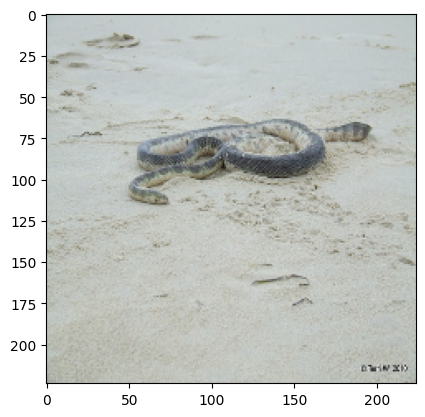

In [17]:
path = r"C:\Users\get2b\Desktop\Arav\AI ML\DATA SETS\ImageNet validation\val\ILSVRC2012_val_00000001.jpeg"
x = torch.tensor(plt.imread(path)).permute(2,0,1)
#x = x.view(2,0,1)
#plt.imshow(x.detach().permute(1,2,0).numpy())
x = torchvision.transforms.Resize((224,224), interpolation=torchvision.transforms.InterpolationMode.BILINEAR, max_size=None, antialias='warn')(x)
plt.imshow(x.detach().permute(1,2,0).numpy())

In [18]:
import pandas as pd
df = pd.read_csv(r"C:\Users\get2b\Desktop\Arav\AI ML\DATA SETS\ImageNet validation\LOC_val_solution.csv")
df.head()

ImageId                                   PredictionString
0  ILSVRC2012_val_00048981                            n03995372 85 1 499 272 
1  ILSVRC2012_val_00037956                           n03481172 131 0 499 254 
2  ILSVRC2012_val_00026161                            n02108000 38 0 464 280 
3  ILSVRC2012_val_00026171                            n03109150 0 14 216 299 
4  ILSVRC2012_val_00008726  n02119789 255 142 454 329 n02119789 44 21 322 ...

In [19]:
df.set_index('ImageId', inplace=True)

In [20]:
df.loc['ILSVRC2012_val_00048981', 'PredictionString'][:9]

'n03995372'

In [21]:
dictionary_for_indexing = {}
count = 0
with open(r"C:\Users\get2b\Desktop\Arav\AI ML\DATA SETS\ImageNet validation\LOC_synset_mapping.txt") as file:
    for line in file.readlines():
        dictionary_for_indexing[line[:9]] = count
        count += 1
print(len(dictionary_for_indexing))

1000


In [22]:
def one_hot_encoding(labels,hr=True):
    finale = []
    if hr:
        for x in labels:
            xen = [.0]*1001
            xen[x] = 1
            finale.append(xen)
    else:
        for x in range(0,len(labels)):
            xen = [.0]*1001
            xen[1000] = 1
            finale.append(xen)
    return torch.tensor(finale).cuda()

In [54]:
def train(epochs):
    
    path_to_hr_img = r"C:\Users\get2b\Desktop\Arav\AI ML\DATA SETS\ImageNet validation\val"
    batch_size = 4
    
    
    for epoch in range(0,epochs):
        
        count = 1
        
        for k in range(0,12500):
            # Making a mini-batch of 4 iamges
            hr_mini_batch2 = []
            sr_target = []
            hr_target = []
            for i in range(0,batch_size):
                sr_target.append(1000)
            sr_target = one_hot_encoding(sr_target)    
            
            for i in range(0,batch_size):
                
                if count>=50000:
                    count = 1
                if count>=0 and count<10:
                    rem_path_w = r"\ILSVRC2012_val_0000000" + str(count) + r".jpeg"
                    label_index = r"\ILSVRC2012_val_0000000" + str(count)
                elif count>9 and count<100:
                    rem_path_w = r"\ILSVRC2012_val_000000" + str(count) + r".jpeg"
                    label_index = r"\ILSVRC2012_val_000000" + str(count)
                elif count>99 and count<1000:
                    rem_path_w = r"\ILSVRC2012_val_00000" + str(count) + r".jpeg"
                    label_index = r"\ILSVRC2012_val_00000" + str(count)
                elif count>999 and count<10000:
                    rem_path_w = r"\ILSVRC2012_val_0000" + str(count) + r".jpeg"
                    label_index = r"\ILSVRC2012_val_0000" + str(count)
                elif count>9999 and count<50001:
                    rem_path_w = r"\ILSVRC2012_val_000" + str(count) + r".jpeg"
                    label_index = r"\ILSVRC2012_val_000" + str(count)
                '''hr_img = torch.tensor(cv2.imread(path_to_hr_img+rem_path_w)).cuda().permute(2,0,1).unsqueeze(0).float()'''
                '''hr_img = torchvision.transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))(hr_img)'''
                hr_img = plt.imread(path_to_hr_img+rem_path_w)
                hr_img = torch.tensor(hr_img).cuda().detach()
                try:
                    hr_img = hr_img.unsqueeze(0).permute(0,3,2,1)
                except:
                    hr_img = np.stack((hr_img.cpu().numpy(),)*3, axis=-1)
                    hr_img = torch.tensor(hr_img).cuda().detach().unsqueeze(0).permute(0,3,2,1)
                hr_img = torchvision.transforms.Resize((224,224), interpolation=torchvision.transforms.InterpolationMode.BILINEAR, max_size=None, antialias='warn')(hr_img)
                hr_label = df.loc[label_index[1:],'PredictionString'][:9]
                hr_label = dictionary_for_indexing[hr_label]
                hr_target.append(hr_label)
                if i==0:
                    hr_mini_batch2 = hr_img
                else:
                    hr_mini_batch2 = torch.cat((hr_mini_batch2,hr_img),0)
                    
                count+=1
            
            hr_target = one_hot_encoding(hr_target)
            #hr_img_breakdown = Image_breakdown_even_further(hr_mini_batch2,lr=False)
            lr_mini_batch1 = torch.nn.functional.interpolate(hr_mini_batch2,scale_factor=0.25)
            #lr_img_breakdown = Image_breakdown_even_further(lr_mini_batch1)
            
            '''for (hr,lr) in zip(hr_mini_batch2,lr_mini_batch1):'''
                
            optimizerDisciminator.zero_grad()
            optimizerGenerator.zero_grad()
            lr = lr_mini_batch1.cuda()/255.0
            hr = hr_mini_batch2.cuda()/255.0
                
            ### Training the discriminator ###
            sr_img = generator(lr).detach()
            '''output = discriminator(sr_img.unsqueeze(0) + torch.Tensor(np.random.uniform(0.0,0.5,sr_img.size())).cuda())[4]'''
            output = discriminator(sr_img)
            super_reso_loss = loss_1(output,sr_target)
                
            
            output = discriminator(hr)
            high_reso_loss = loss_1(output,hr_target)
                
                
            ### Training the generator ###
            sr_img = generator(lr)
            vgg_maps_sr = vgg_19(sr_img) # + torch.Tensor(np.random.uniform(0,.0,sr_img.size())).cuda()
            vgg_maps_hr = vgg_19(hr) # + torch.Tensor(np.random.uniform(0,.0,hr.size())).cuda()
            loss_mse_1 = loss_2(vgg_maps_sr[0],vgg_maps_hr[0])
            loss_mse_2 = loss_2(vgg_maps_sr[1],vgg_maps_hr[1])
            loss_mse_3 = loss_2(vgg_maps_sr[2],vgg_maps_hr[2])
            loss_mse_4 = loss_2(vgg_maps_sr[3],vgg_maps_hr[3])
            loss_mse_5 = loss_2(vgg_maps_sr[4],vgg_maps_hr[4])
            discriminator_target = discriminator(sr_img)
            loss_bce_1 = loss_1(discriminator_target,hr_target)
            OverallLoss = (loss_mse_1 + loss_mse_2 + loss_mse_3 + loss_mse_4 + loss_mse_5 + (loss_bce_1))
                
                
                
            high_reso_loss.backward()
            super_reso_loss.backward()
            optimizerDisciminator.step()
                    
            OverallLoss.backward()
            plot_grad_flow(generator.named_parameters())
            #torch.nn.utils.clip_grad_norm_(generator.parameters(), 1)
            optimizerGenerator.step()
            
            del(hr_mini_batch2)
            
            if k%10 == 0:
                print('[%d/%d]\t[%d/%d]\t\tHigh_reso_loss: %.4f\t\tSuper_reso_loss: %.4f\t\tLoss_SR_VGG-Generator: %.4f'
                % (epoch, epochs, k, 12500, high_reso_loss.item(), super_reso_loss.item(), OverallLoss.item()))

In [24]:
def pre_train(epochs):
    
    path_to_hr_img = r"C:\Users\get2b\Desktop\Arav\AI ML\DATA SETS\ImageNet validation\val\ILSVRC2012_val_"
    batch_size = 4
    sr_target = torch.tensor([[0.1]]*batch_size).cuda()
    hr_target = torch.tensor([[0.9]]*batch_size).cuda()
    
    for epoch in range(0,epochs):
        
        count = 1
        
        for k in range(0,20260):
            # Making a mini-batch of 16 iamges
            
            for i in range(0,batch_size):
                
                if count>=20261:
                    count = 0
                if count>=0 and count<10:
                    rem_path_w = r"0000000" + str(count) + r".jpeg"
                elif count>9 and count<100:
                    rem_path_w = r"000000" + str(count) + r".jpeg"
                elif count>99 and count<1000:
                    rem_path_w = r"00000" + str(count) + r".jpeg"
                elif count>999 and count<10000:
                    rem_path_w = r"0000" + str(count) + r".jpeg"
                elif count>9999 and count<50001:
                    rem_path_w = r"000" + str(count) + r".jpeg"
                '''hr_img = torch.tensor(cv2.imread(path_to_hr_img+rem_path_w)).cuda().permute(2,0,1).unsqueeze(0).float()'''
                '''hr_img = torchvision.transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))(hr_img)'''
                hr_img = plt.imread(path_to_hr_img+rem_path_w)
                hr_img = torch.tensor(hr_img).cuda().detach()
                hr_img = hr_img.unsqueeze(0).permute(0,3,2,1)
                hr_img = torchvision.transforms.Pad((0,0,1,0),padding_mode="edge").cuda()(hr_img).detach()
                if i==0:
                    hr_mini_batch2 = hr_img
                else:
                    hr_mini_batch2 = torch.cat((hr_mini_batch2,hr_img),0)
                count+=1
            
            hr_mini_batch2 = torchvision.transforms.Resize((224,224), interpolation=torchvision.transforms.InterpolationMode.BILINEAR, max_size=None, antialias='warn')(hr_mini_batch2)
            #hr_img_breakdown = Image_breakdown_even_further(hr_mini_batch2,lr=False)
            lr_mini_batch1 = torch.nn.functional.interpolate(hr_mini_batch2,scale_factor=0.25)
            #lr_img_breakdown = Image_breakdown_even_further(lr_mini_batch1)

            optimizerGenerator.zero_grad(set_to_none=False)
            lr,hr = lr_mini_batch1.cuda().float(),hr_mini_batch2.cuda().float()
                
                
            ### Training the generator ###
            sr_img = generator(lr)
            vgg_maps_sr = vgg_19(sr_img + torch.Tensor(np.random.uniform(.0,1.0,sr_img.size())).cuda())
            vgg_maps_hr = vgg_19(hr + torch.Tensor(np.random.uniform(.0,1.0,hr.size())).cuda())
            loss_mse_1 = loss_2(vgg_maps_sr[0],vgg_maps_hr[0])
            loss_mse_2 = loss_2(vgg_maps_sr[1],vgg_maps_hr[1])
            loss_mse_3 = loss_2(vgg_maps_sr[2],vgg_maps_hr[2])
            loss_mse_4 = loss_2(vgg_maps_sr[3],vgg_maps_hr[3])
            loss_mse_5 = loss_2(vgg_maps_sr[4],vgg_maps_hr[4])
            OverallLoss = (loss_mse_1 + loss_mse_2 + loss_mse_3 + loss_mse_4 + loss_mse_5)
                
                    
            OverallLoss.backward()
            plot_grad_flow(generator.named_parameters())
            optimizerGenerator.step()
                
            if k%10 == 0:
                print('[%d/%d]\t[%d/%d]\tLoss_SR_VGG-Generator: %.4f'
                % (epoch, epochs, k, 20620/batch_size, OverallLoss.item()))

In [25]:
path_to_hr_img = r"C:\Users\get2b\Desktop\Arav\AI ML\DATA SETS\ImageNet validation\val_size_375_500_3\ILSVRC2012_val_"
rem_path_w = r"00000001.jpeg"
hr_img = plt.imread(path_to_hr_img+rem_path_w)
hr_img = np.expand_dims(hr_img,0)
print(hr_img.shape)
hr_img = np.pad(hr_img,((0,0),(0,1),(0,0),(0,0)),mode="edge")
print(hr_img.shape)

(1, 375, 500, 3)
(1, 376, 500, 3)


In [26]:
hr_mini_batch1 = np.asarray(hr_img)
hr_mini_batch1 = torch.tensor(hr_mini_batch1).cuda().permute(0,3,1,2).float()
print(hr_mini_batch1.shape)

torch.Size([1, 3, 376, 500])


In [27]:
hr_imim = Image_breakdown_even_further(hr_mini_batch1,lr=False)
for i in hr_imim:
    print(i.shape)

torch.Size([1, 3, 188, 248])
torch.Size([1, 3, 188, 252])
torch.Size([1, 3, 188, 248])
torch.Size([1, 3, 188, 252])


In [28]:
lr_mini_batch1 = torch.nn.functional.interpolate(hr_mini_batch1,scale_factor=0.25,mode="nearest").cuda().float()
print(lr_mini_batch1.shape)

torch.Size([1, 3, 94, 125])


In [29]:
lr_imim = Image_breakdown_even_further(lr_mini_batch1)
for i in lr_imim:
    print(i.shape)

torch.Size([1, 3, 47, 62])
torch.Size([1, 3, 47, 63])
torch.Size([1, 3, 47, 62])
torch.Size([1, 3, 47, 63])


In [30]:
a = np.random.random((3,375,500))
a = np.pad(a,((0,0),(0,1),(0,0)),mode="edge")
a.shape

(3, 376, 500)

In [31]:
a = torch.rand((8,3,94,125)).cuda()
a = generator(a)
a.shape

torch.Size([8, 3, 376, 500])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

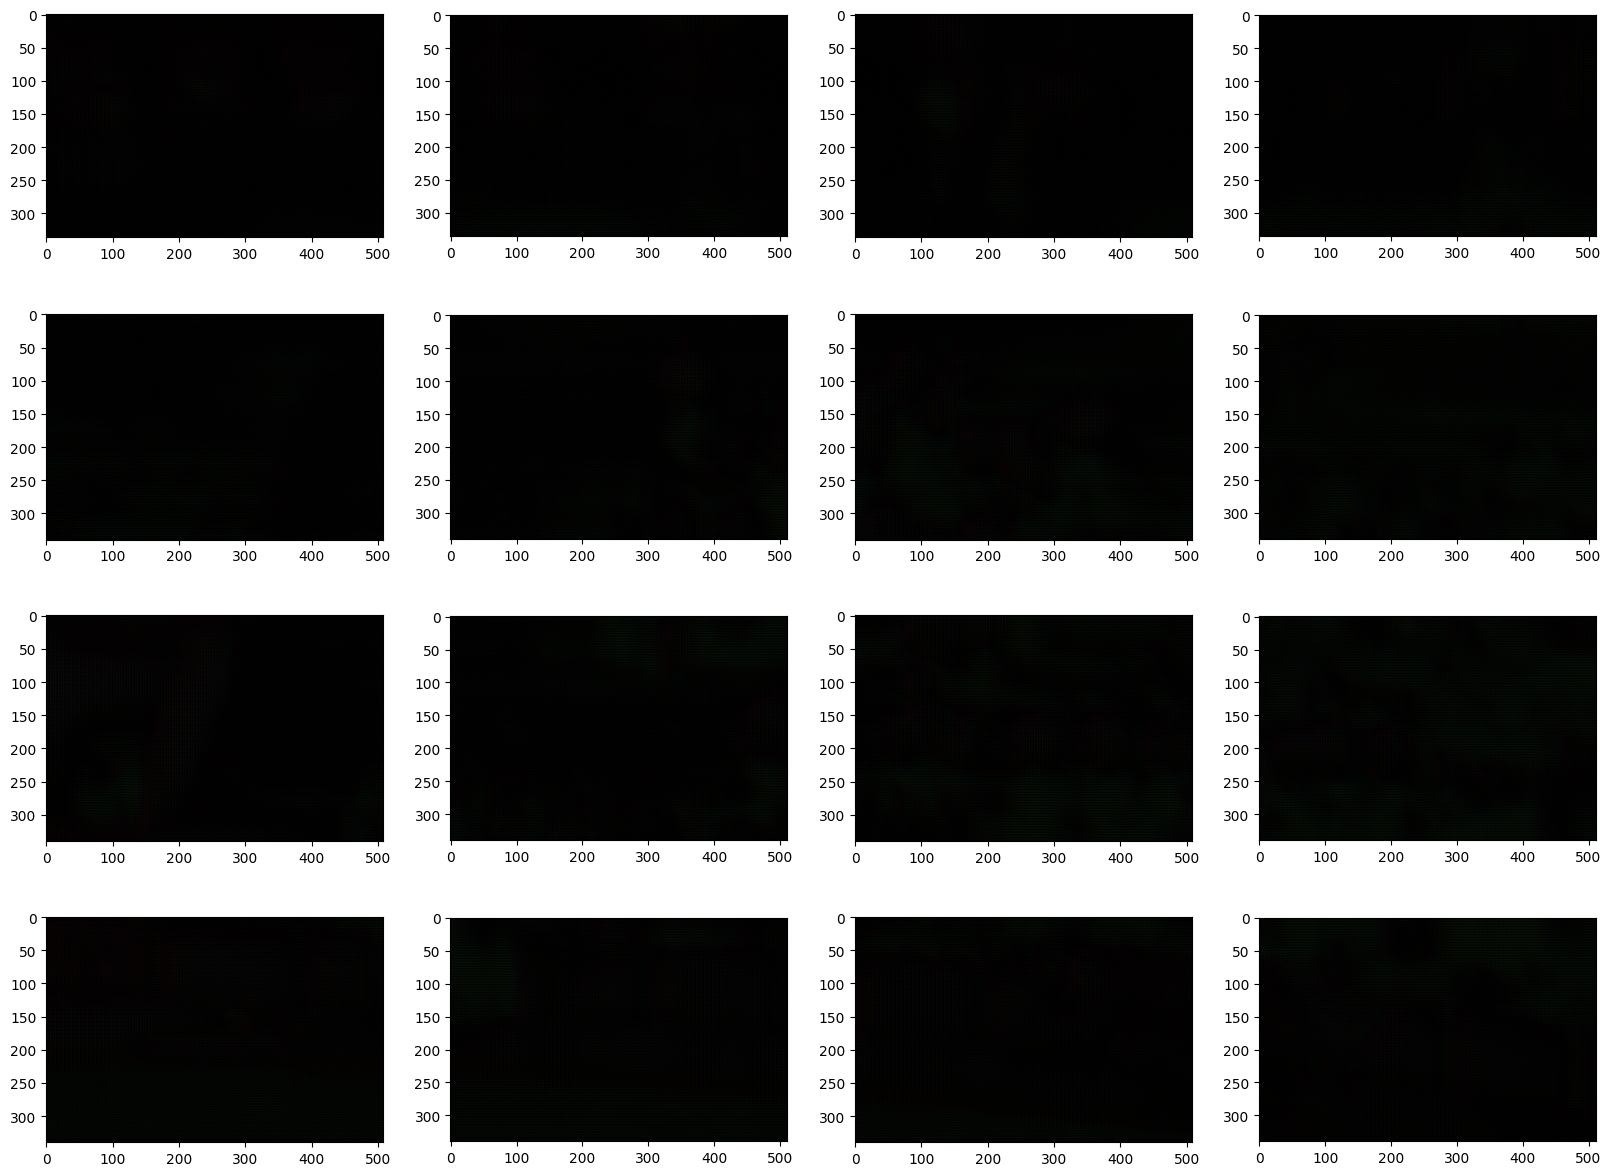

In [32]:
def verifying():
    generator.eval()
    path_for_valid_lr = "C:\\Users\\get2b\\Desktop\\Arav\\AI ML\\DATA SETS\\Generative AI dataset DIV2K\\\DIV2K_valid_LR_difficult\\DIV2K_valid_LR_difficult\\0825x4d.png"
    lr_img = plt.imread(path_for_valid_lr)
    lr_img = torch.Tensor(lr_img).cuda().unsqueeze(0).permute(0,3,1,2)
    
    lr_img = torchvision.transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)).cuda()(lr_img)
    lr_img = Image_breakdown_further(lr_img,lr=True)
    sr_img = []
    for i in range(0,16):
        sr_img.append(generator(lr_img[i]))
    x = sr_img
    rows = 4
    columns = 4
    fig = plt.figure(figsize=(20, 15))
    for i in range(1,17):
        fig.add_subplot(rows, columns, i)
        x[i-1] = x[i-1].permute(0,2,3,1)
        x[i-1] = x[i-1].cpu().detach().numpy()
        plt.imshow(x[i-1][0])
        plt.grid(visible=False)
verifying()

c:\Users\get2b\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


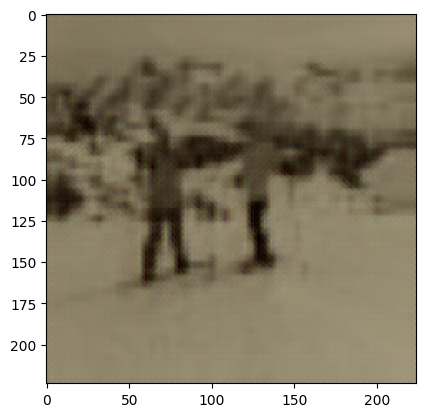

In [40]:
def verify():
    x = plt.imread(r"C:\Users\get2b\Desktop\Arav\AI ML\DATA SETS\ImageNet validation\val\ILSVRC2012_val_00000002.JPEG")
    x = torch.tensor(x).cuda().permute(2,0,1)
    x_lr = torchvision.transforms.Resize((224,224), interpolation=torchvision.transforms.InterpolationMode.BILINEAR, max_size=None, antialias='warn')(x)
    x_lr = torchvision.transforms.Resize((56,56), interpolation=torchvision.transforms.InterpolationMode.BILINEAR, max_size=None, antialias='warn')(x_lr)
    #x_lr = torchvision.transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)).cuda()(x_lr.cuda().float())
    x_lr = x_lr/255.0
    plt.imshow(x_lr.cpu().permute(1,2,0).detach().numpy())
    x_sr = generator(x_lr)
    plt.imshow(x_sr.cpu().permute(1,2,0).detach().numpy())
verify()

[0/1]	[0/12500]		High_reso_loss: 6.9105		Super_reso_loss: 5.9105		Loss_SR_VGG-Generator: 6.9521
[0/1]	[10/12500]		High_reso_loss: 6.9105		Super_reso_loss: 5.9105		Loss_SR_VGG-Generator: 6.9610
[0/1]	[20/12500]		High_reso_loss: 6.9105		Super_reso_loss: 5.9105		Loss_SR_VGG-Generator: 6.9645
[0/1]	[30/12500]		High_reso_loss: 6.9105		Super_reso_loss: 5.9105		Loss_SR_VGG-Generator: 6.9492
[0/1]	[40/12500]		High_reso_loss: 6.9105		Super_reso_loss: 5.9105		Loss_SR_VGG-Generator: 6.9480
[0/1]	[50/12500]		High_reso_loss: 6.9105		Super_reso_loss: 5.9105		Loss_SR_VGG-Generator: 6.9729
[0/1]	[60/12500]		High_reso_loss: 6.9105		Super_reso_loss: 5.9105		Loss_SR_VGG-Generator: 6.9627
[0/1]	[70/12500]		High_reso_loss: 6.9105		Super_reso_loss: 5.9105		Loss_SR_VGG-Generator: 6.9542
[0/1]	[80/12500]		High_reso_loss: 6.9105		Super_reso_loss: 5.9105		Loss_SR_VGG-Generator: 6.9630
[0/1]	[90/12500]		High_reso_loss: 6.9105		Super_reso_loss: 5.9105		Loss_SR_VGG-Generator: 6.9827
[0/1]	[100/12500]		High_reso_lo

KeyboardInterrupt: 

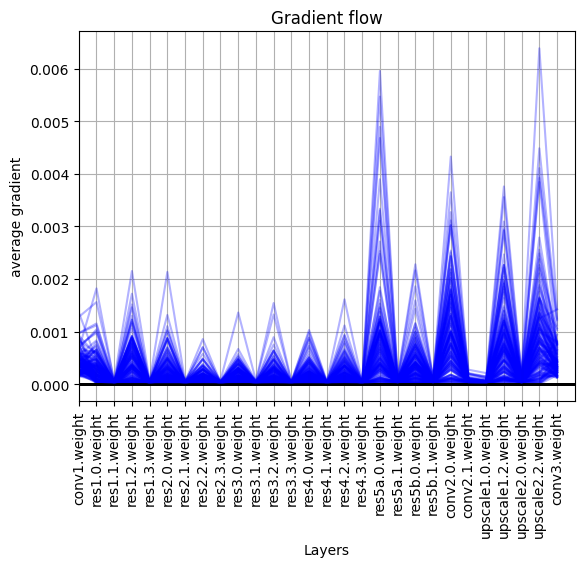

In [55]:
train(1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

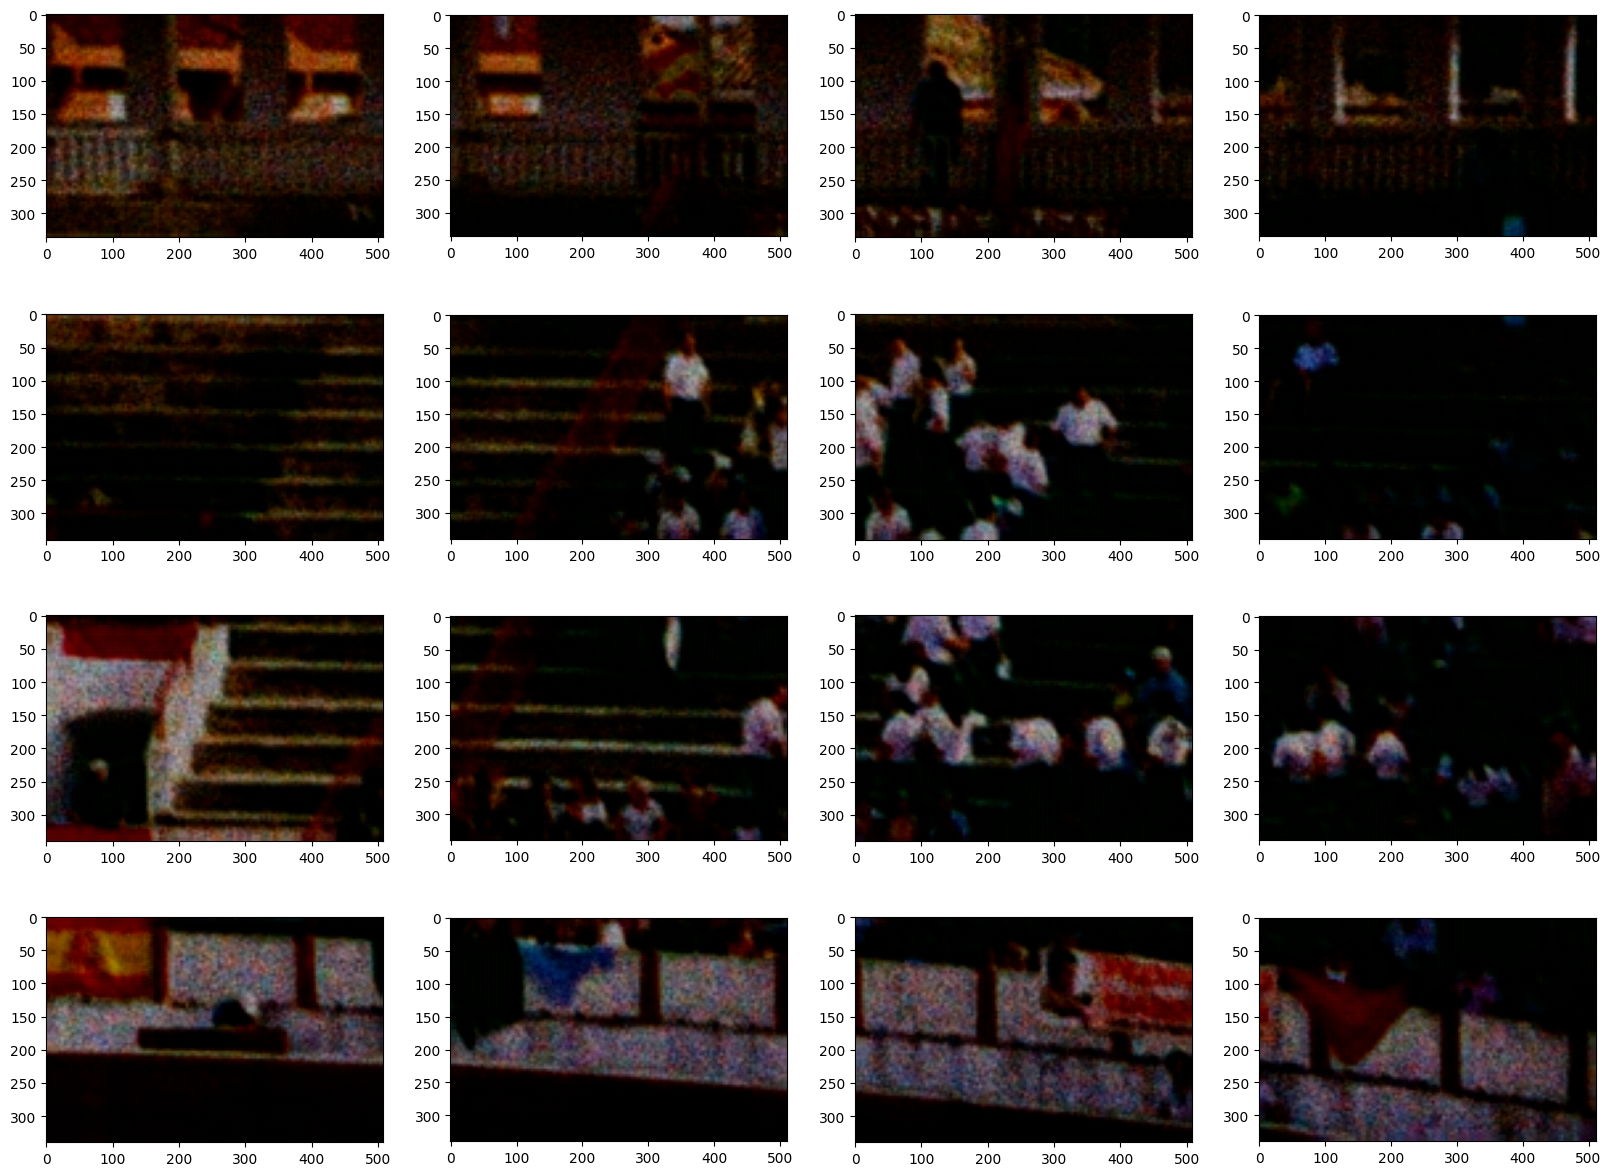

In [56]:
verifying()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


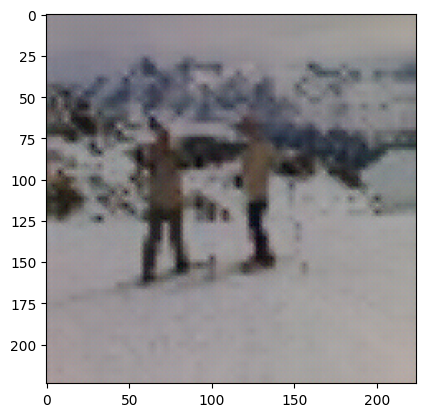

In [57]:
verify()

In [ ]:
'''torch.save(generator.state_dict(), 'C:\\Users\\get2b\\Desktop\\Arav\\Neural Networks\\2. Pytorch implementation\\0. All Models Saved\\GeneratorSRGAN_ImageNet.pth')
torch.save(discriminator.state_dict(), 'C:\\Users\\get2b\\Desktop\\Arav\\Neural Networks\\2. Pytorch implementation\\0. All Models Saved\\DiscriminatorSRGAN_ImageNet.pth')'''